In [11]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AffinityPropagation
from minisom import MiniSom
import matplotlib as mpl

mpl.rcParams['figure.dpi'] = 400


In [12]:
# Read the data and standardize it just in case
glass = np.genfromtxt("glas_data_preprocessing/glas-preprocessed.csv", skip_header=True, delimiter=',')
glass[:, :-1] = (glass[:, :-1]  - np.mean(glass[:, :-1], axis=0)) / np.std(glass[:, :-1], axis=0)
print(glass.shape)
print(np.max(glass[:, -1]))

dataset_1 = np.genfromtxt("data_data_preprocessing/data-preprocessed.csv", skip_header=True, delimiter=',')
dataset_1[:, :-1] = (dataset_1[:, :-1] - np.mean(dataset_1[:, :-1], axis=0)) / np.std(dataset_1[:, :-1], axis=0)
print(dataset_1.shape)
print(np.min(dataset_1, axis=0))

(214, 10)
7.0
(360, 5)
[-2.25620249 -2.16568552 -2.11316192 -2.30227955  1.        ]


 [ 5000 / 5000 ] 100% - 0:00:00 left 
 quantization error: 0.523595597396432
 [ 5000 / 5000 ] 100% - 0:00:00 left 
 quantization error: 0.34999867413818103
 [ 5000 / 5000 ] 100% - 0:00:00 left 
 quantization error: 0.672418573711845
 [ 5000 / 5000 ] 100% - 0:00:00 left 
 quantization error: 0.22831893905542983


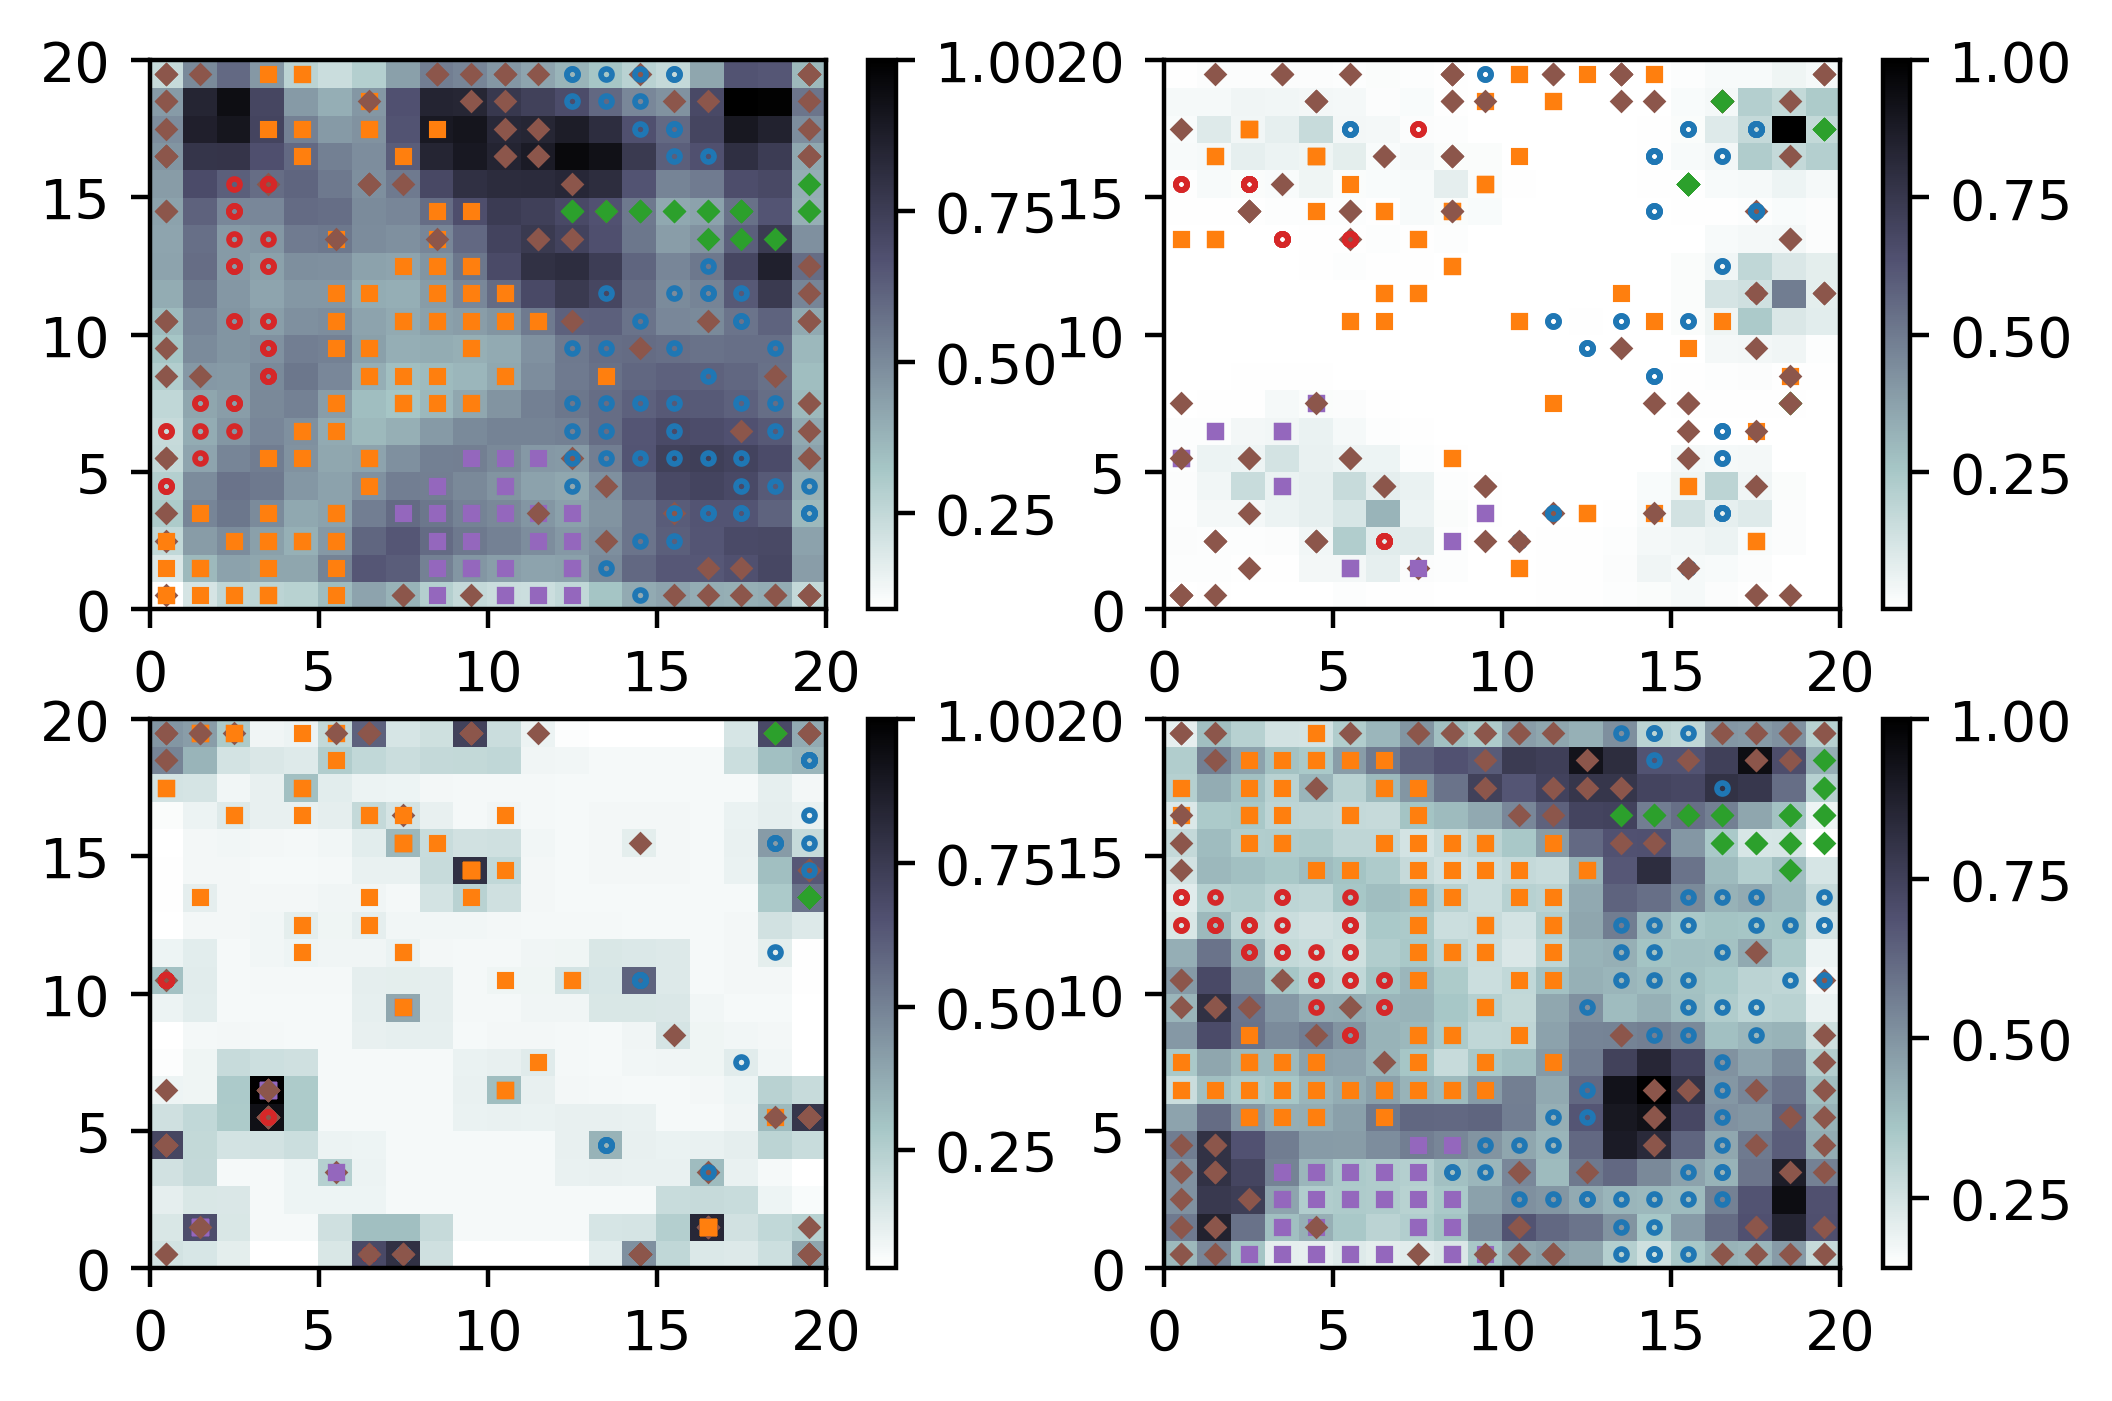

In [41]:
training_data = dataset_1[:, :-1]
target = np.array(dataset_1[:, -1], dtype=np.uint8)
label_names = list(map(str, range(1, 8)))

parameters_to_try = [
    {"sigma": 4.5, "learning_rate": .5, "neighborhood_function": "gaussian", "topology": "rectangular"},
    {"sigma": .5, "learning_rate": .5, "neighborhood_function": "mexican_hat", "topology": "rectangular"},
    {"sigma": .25, "learning_rate": .05, "neighborhood_function": "mexican_hat", "topology": "rectangular"},
    {"sigma": 1.5, "learning_rate": .5, "neighborhood_function": "gaussian", "topology": "rectangular"},
]

for i in range(len(parameters_to_try)):
    plt.subplot(2, 2, i + 1)
    n_neurons = 20
    m_neurons = 20
    som = MiniSom(n_neurons, m_neurons, training_data.shape[1], random_seed=42, **parameters_to_try[i])

    som.pca_weights_init(training_data)
    som.train(training_data, 5000, verbose=True)

    plt.pcolor(som.distance_map().T, cmap='bone_r')  # plotting the distance map as background
    plt.colorbar()

    # Plotting the response for each pattern in the iris dataset
    # different colors and markers for each label
    markers = ['o', 's', 'D', 'o', 's', 'D', 'o']
    colors = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6']
    for cnt, xx in enumerate(training_data):
        w = som.winner(xx)  # getting the winner
        # palce a marker on the winning position for the sample xx
        plt.plot(w[0]+.5, w[1]+.5, markers[target[cnt]-1], markerfacecolor='None',
                 markeredgecolor=colors[target[cnt]-1], markersize=1, markeredgewidth=2)

plt.show()

### We can see that on the first dataset, self-organizing maps can separate 5 out of 6 clusters very well when using Gaussian kernel. Again, "brown" points are mixed into all other classes around the map making it very difficult to distinguish them. Gaussian kernels with different sigmas give good results, while for mexican hat kernel this requires much more tuning and does not produce good results. When training we use map of size 20x20 to keep it large enough, but not produce too many of them, as there are only 214 and 360 samples in our datasets

#### Now, let's plot a map for each input sample, using the last (bottom right) trained model

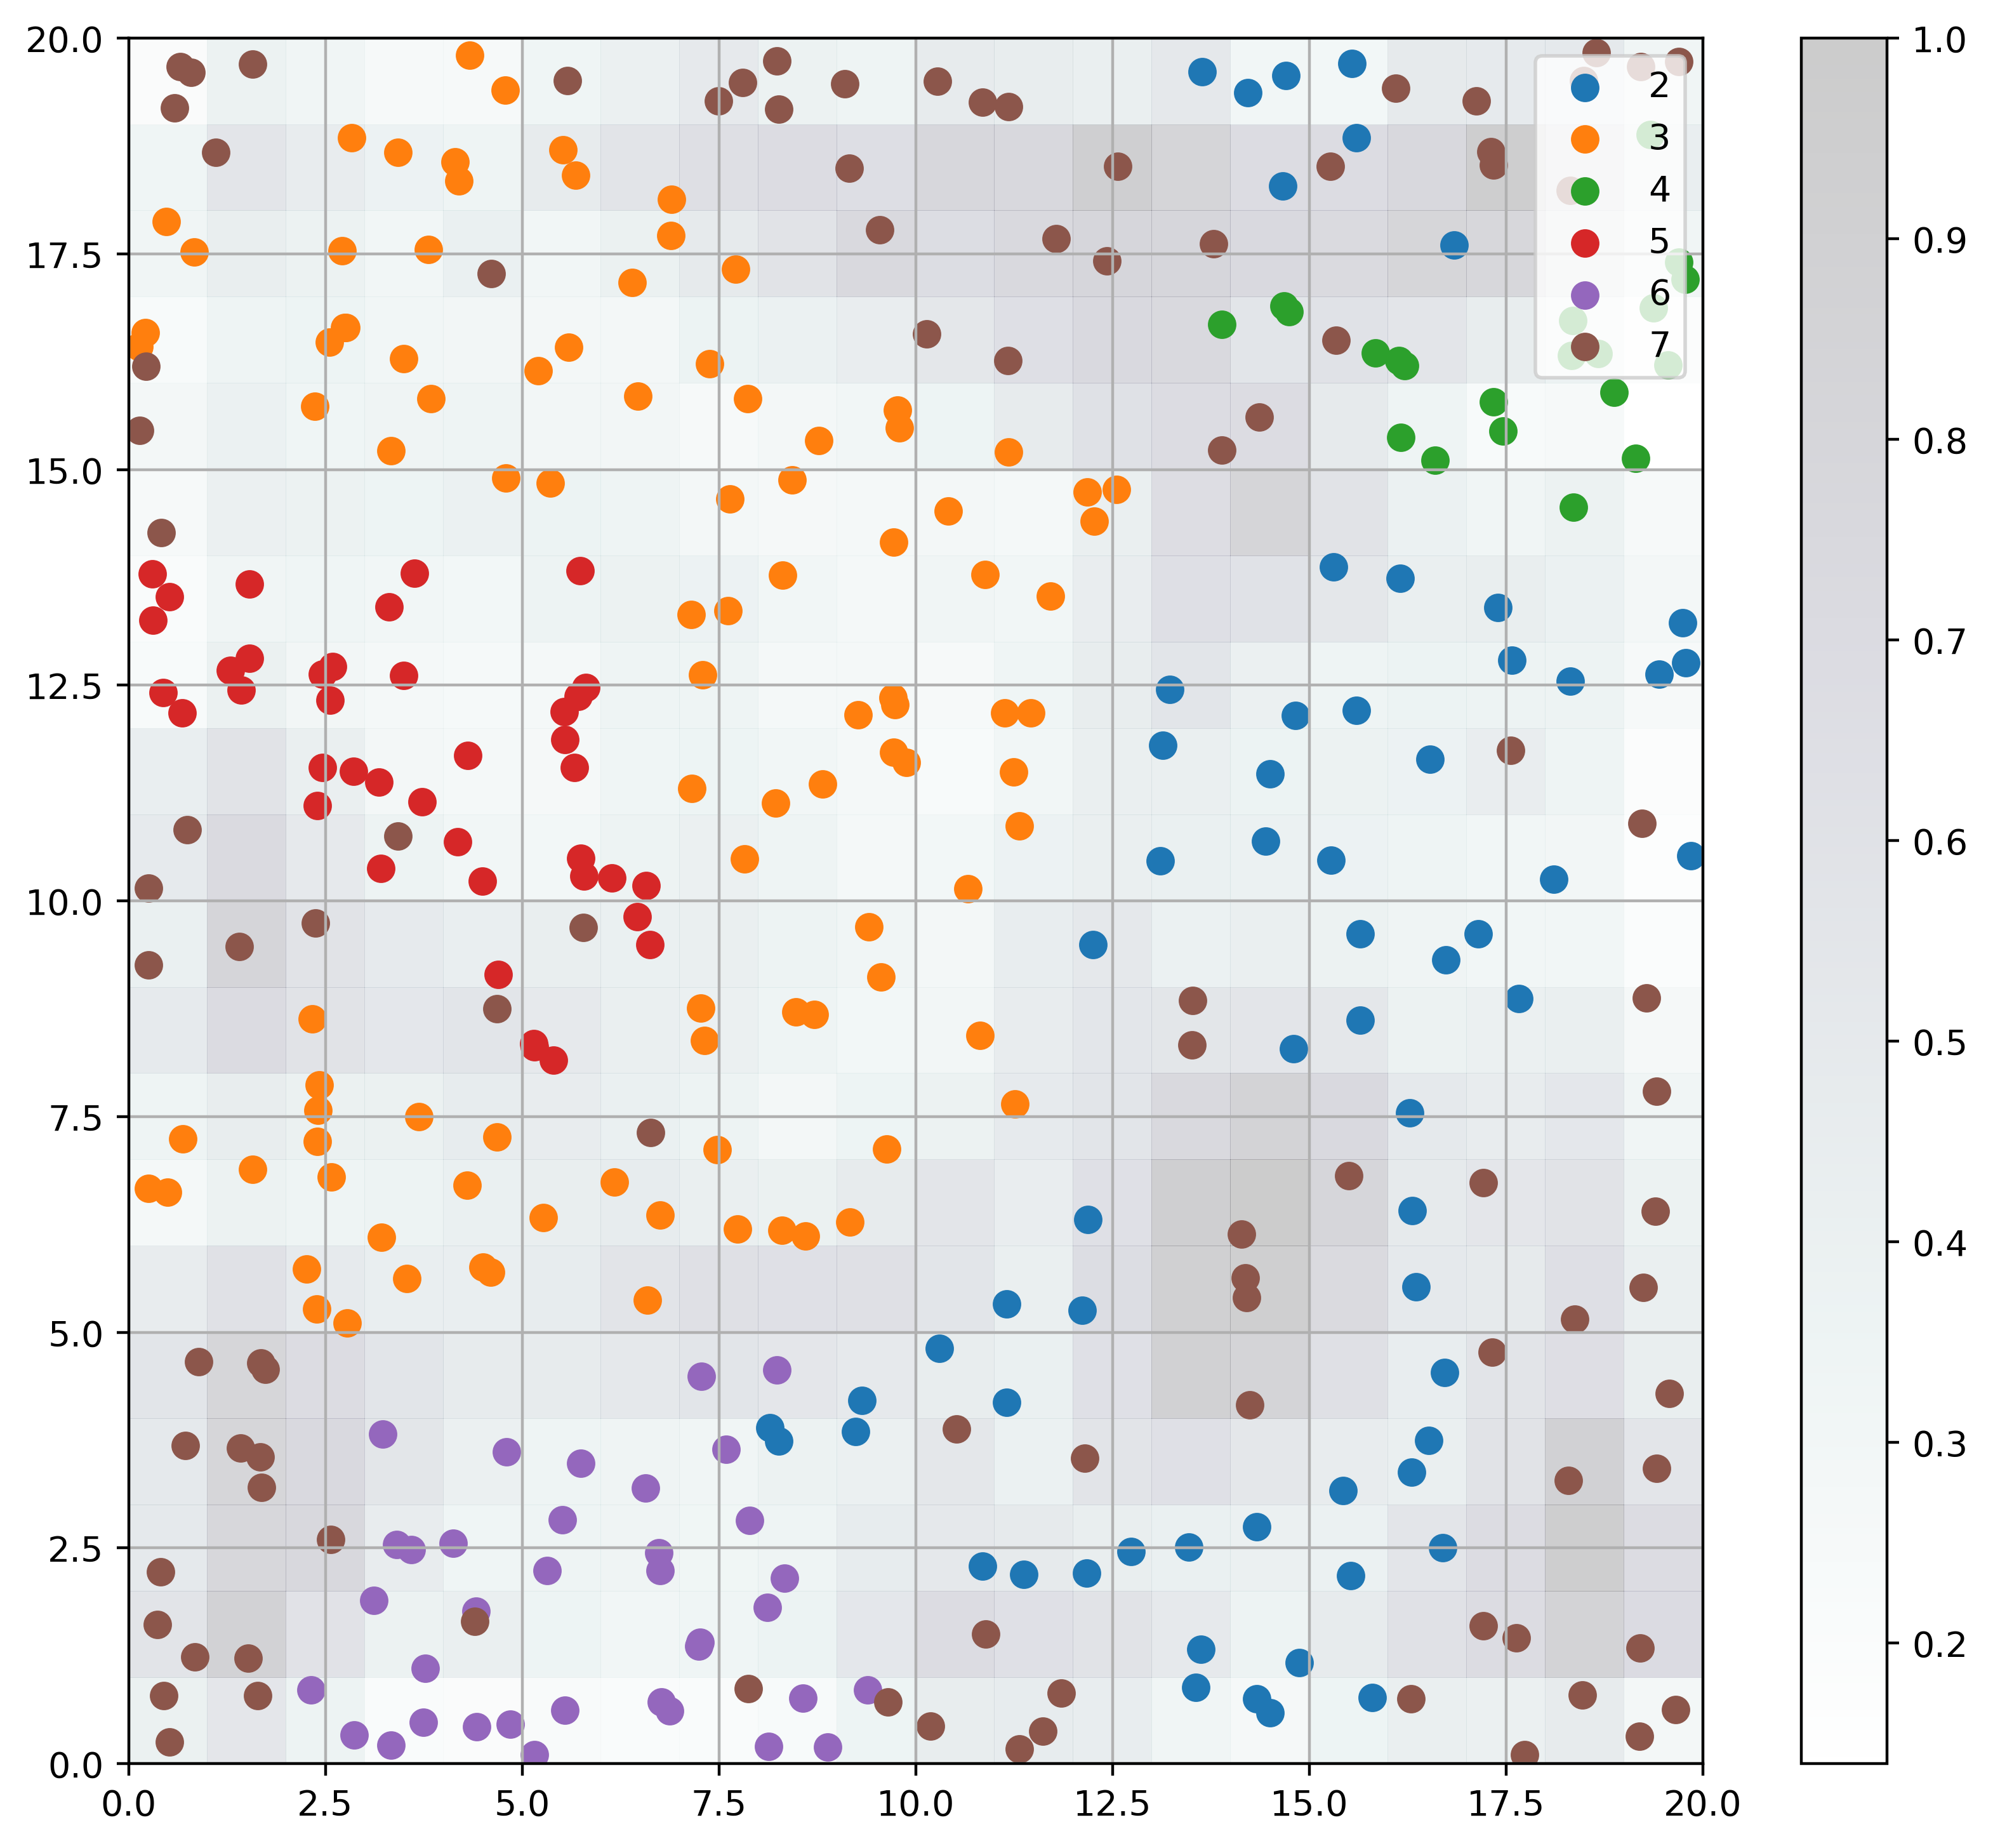

In [42]:
w_x, w_y = zip(*[som.winner(d) for d in training_data])
w_x = np.array(w_x)
w_y = np.array(w_y)

plt.figure(figsize=(10, 9))
plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=.2)
plt.colorbar()

for c in np.unique(target):
    idx_target = target==c
    plt.scatter(w_x[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8,
                w_y[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8,
                s=50, c=colors[c-1], label=label_names[c])
plt.legend(loc='upper right')
plt.grid()
plt.show()

IndexError: index 4 is out of bounds for axis 2 with size 4

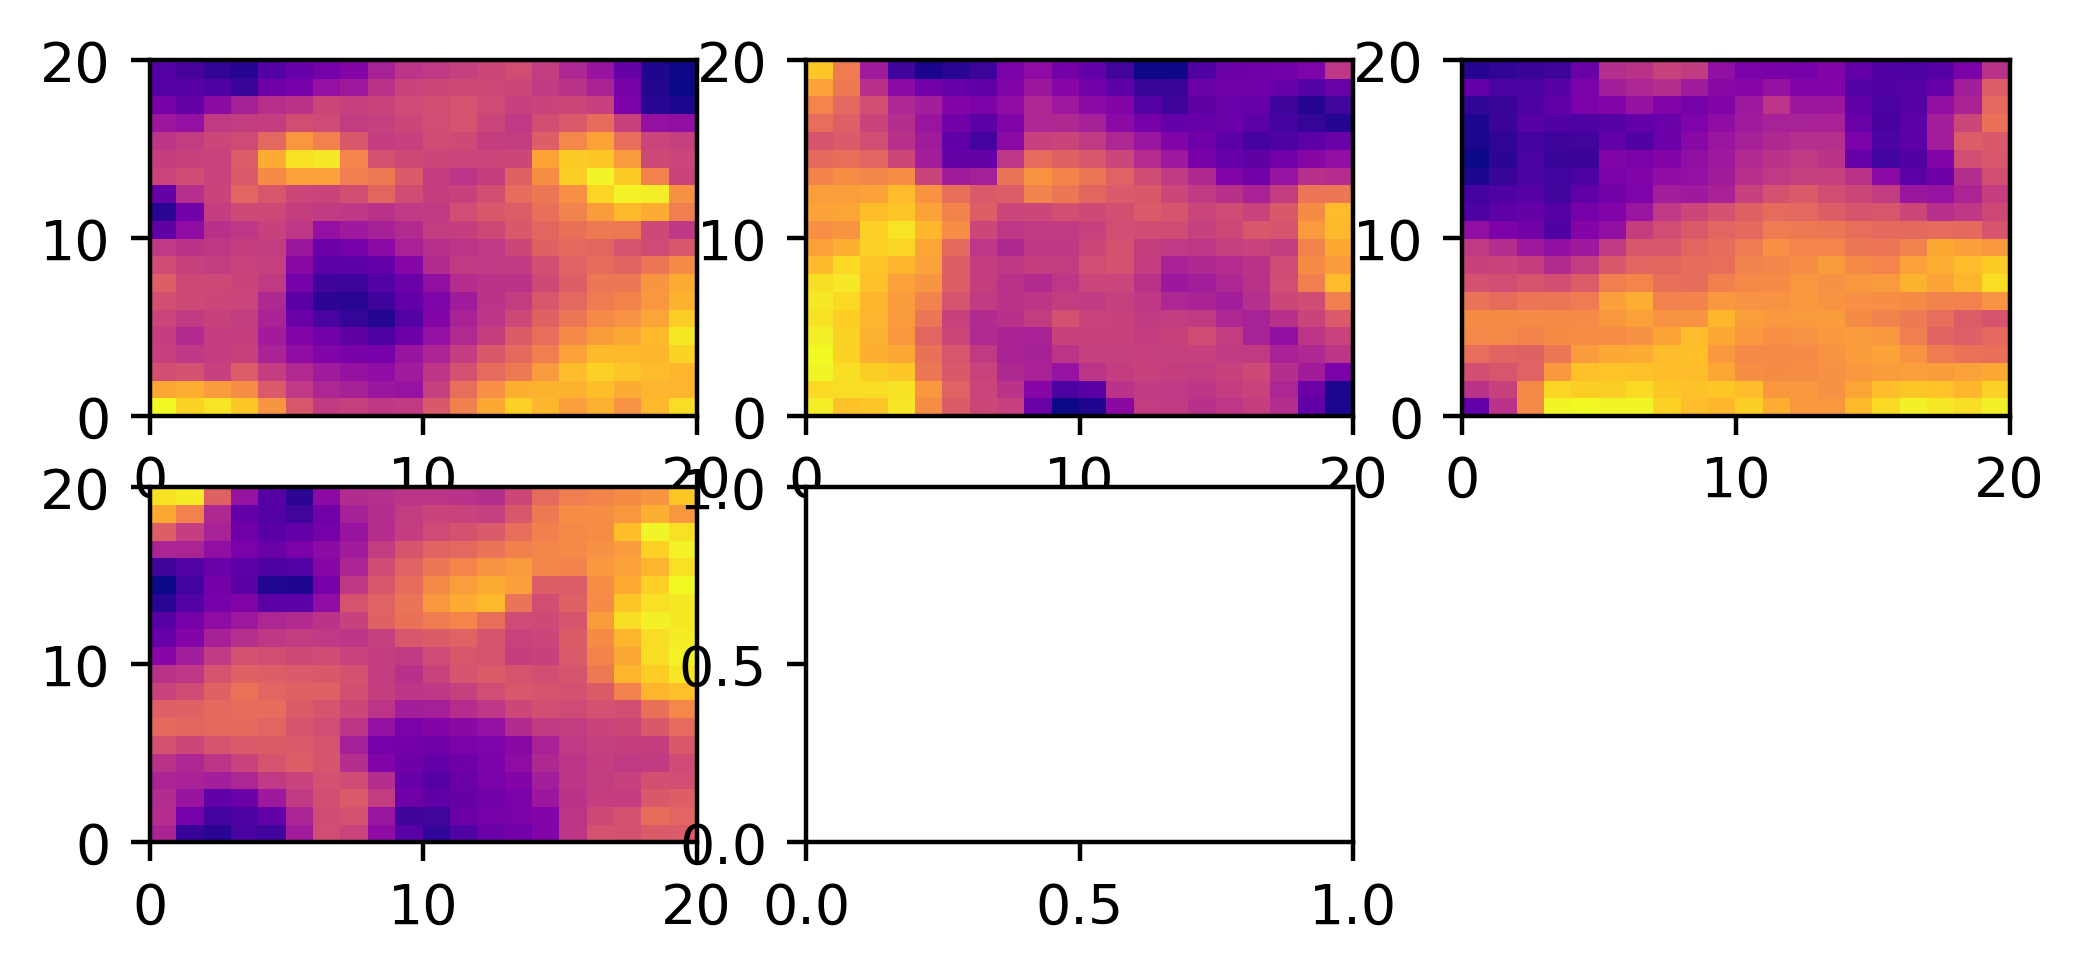

In [46]:
w = som.get_weights()
for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.pcolor(w[:, :, i], cmap='plasma')

## And doing the same for Glass dataset

 [ 5000 / 5000 ] 100% - 0:00:00 left 
 quantization error: 0.7753901825827901
 [ 5000 / 5000 ] 100% - 0:00:00 left 
 quantization error: 0.5522936343623527
 [ 5000 / 5000 ] 100% - 0:00:00 left 
 quantization error: 1.0615724738812045
 [ 5000 / 5000 ] 100% - 0:00:00 left 
 quantization error: 0.23051653898473276


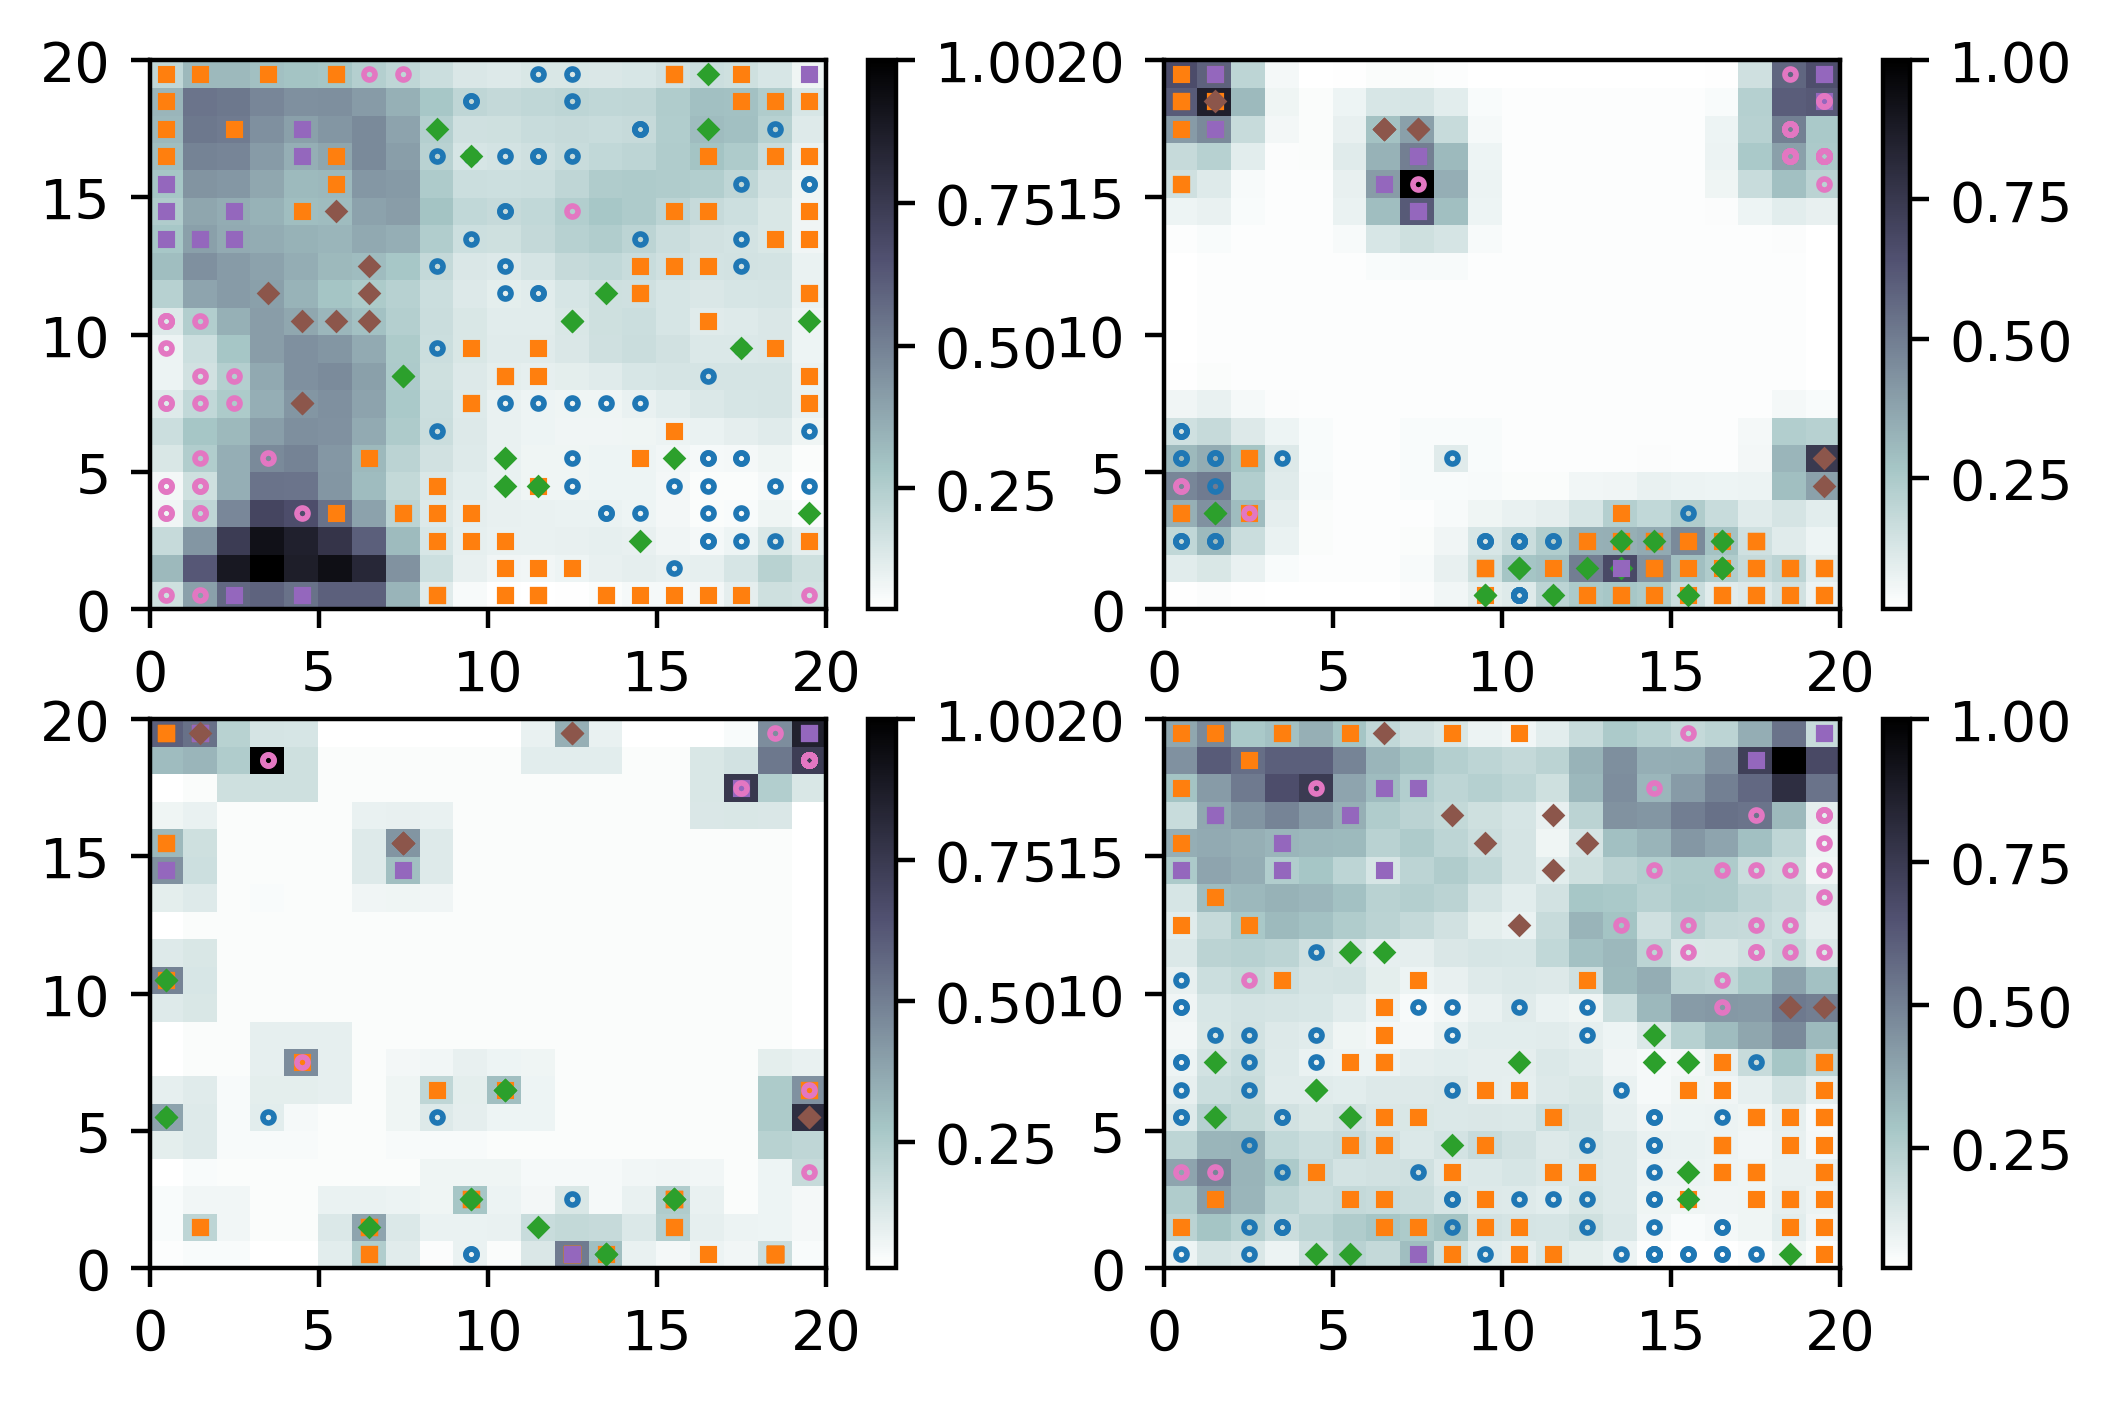

In [15]:
training_data = glass[:, :-1]
target = np.array(glass[:, -1], dtype=np.uint8)
label_names = list(map(str, range(1, 9)))

parameters_to_try = [
    {"sigma": 4.5, "learning_rate": .5, "neighborhood_function": "gaussian", "topology": "rectangular"},
    {"sigma": .5, "learning_rate": .5, "neighborhood_function": "gaussian", "topology": "rectangular"},
    {"sigma": .25, "learning_rate": .05, "neighborhood_function": "mexican_hat", "topology": "rectangular"},
    {"sigma": 1.5, "learning_rate": .5, "neighborhood_function": "gaussian", "topology": "rectangular"},
]

for i in range(len(parameters_to_try)):
    plt.subplot(2, 2, i + 1)
    n_neurons = 20
    m_neurons = 20
    som = MiniSom(n_neurons, m_neurons, training_data.shape[1], random_seed=42, **parameters_to_try[i])

    som.pca_weights_init(training_data)
    som.train(training_data, 5000, verbose=True)

    plt.pcolor(som.distance_map().T, cmap='bone_r')  # plotting the distance map as background
    plt.colorbar()

    # Plotting the response for each pattern in the iris dataset
    # different colors and markers for each label
    markers = ['o', 's', 'D', 'o', 's', 'D', 'o', 'c']
    colors = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7']
    for cnt, xx in enumerate(training_data):
        w = som.winner(xx)  # getting the winner
        # palce a marker on the winning position for the sample xx
        plt.plot(w[0]+.5, w[1]+.5, markers[target[cnt]-1], markerfacecolor='None',
                 markeredgecolor=colors[target[cnt]-1], markersize=1, markeredgewidth=2)

plt.show()

#### In this scenario, again, the mexican hat kernel does not perform well. We can also see that having too small sigma for gaussian kernels produces bad clustering too. After training with gaussian kernels, some classes are easily separable (pink, violet, brown), but some are still heavily intermixed

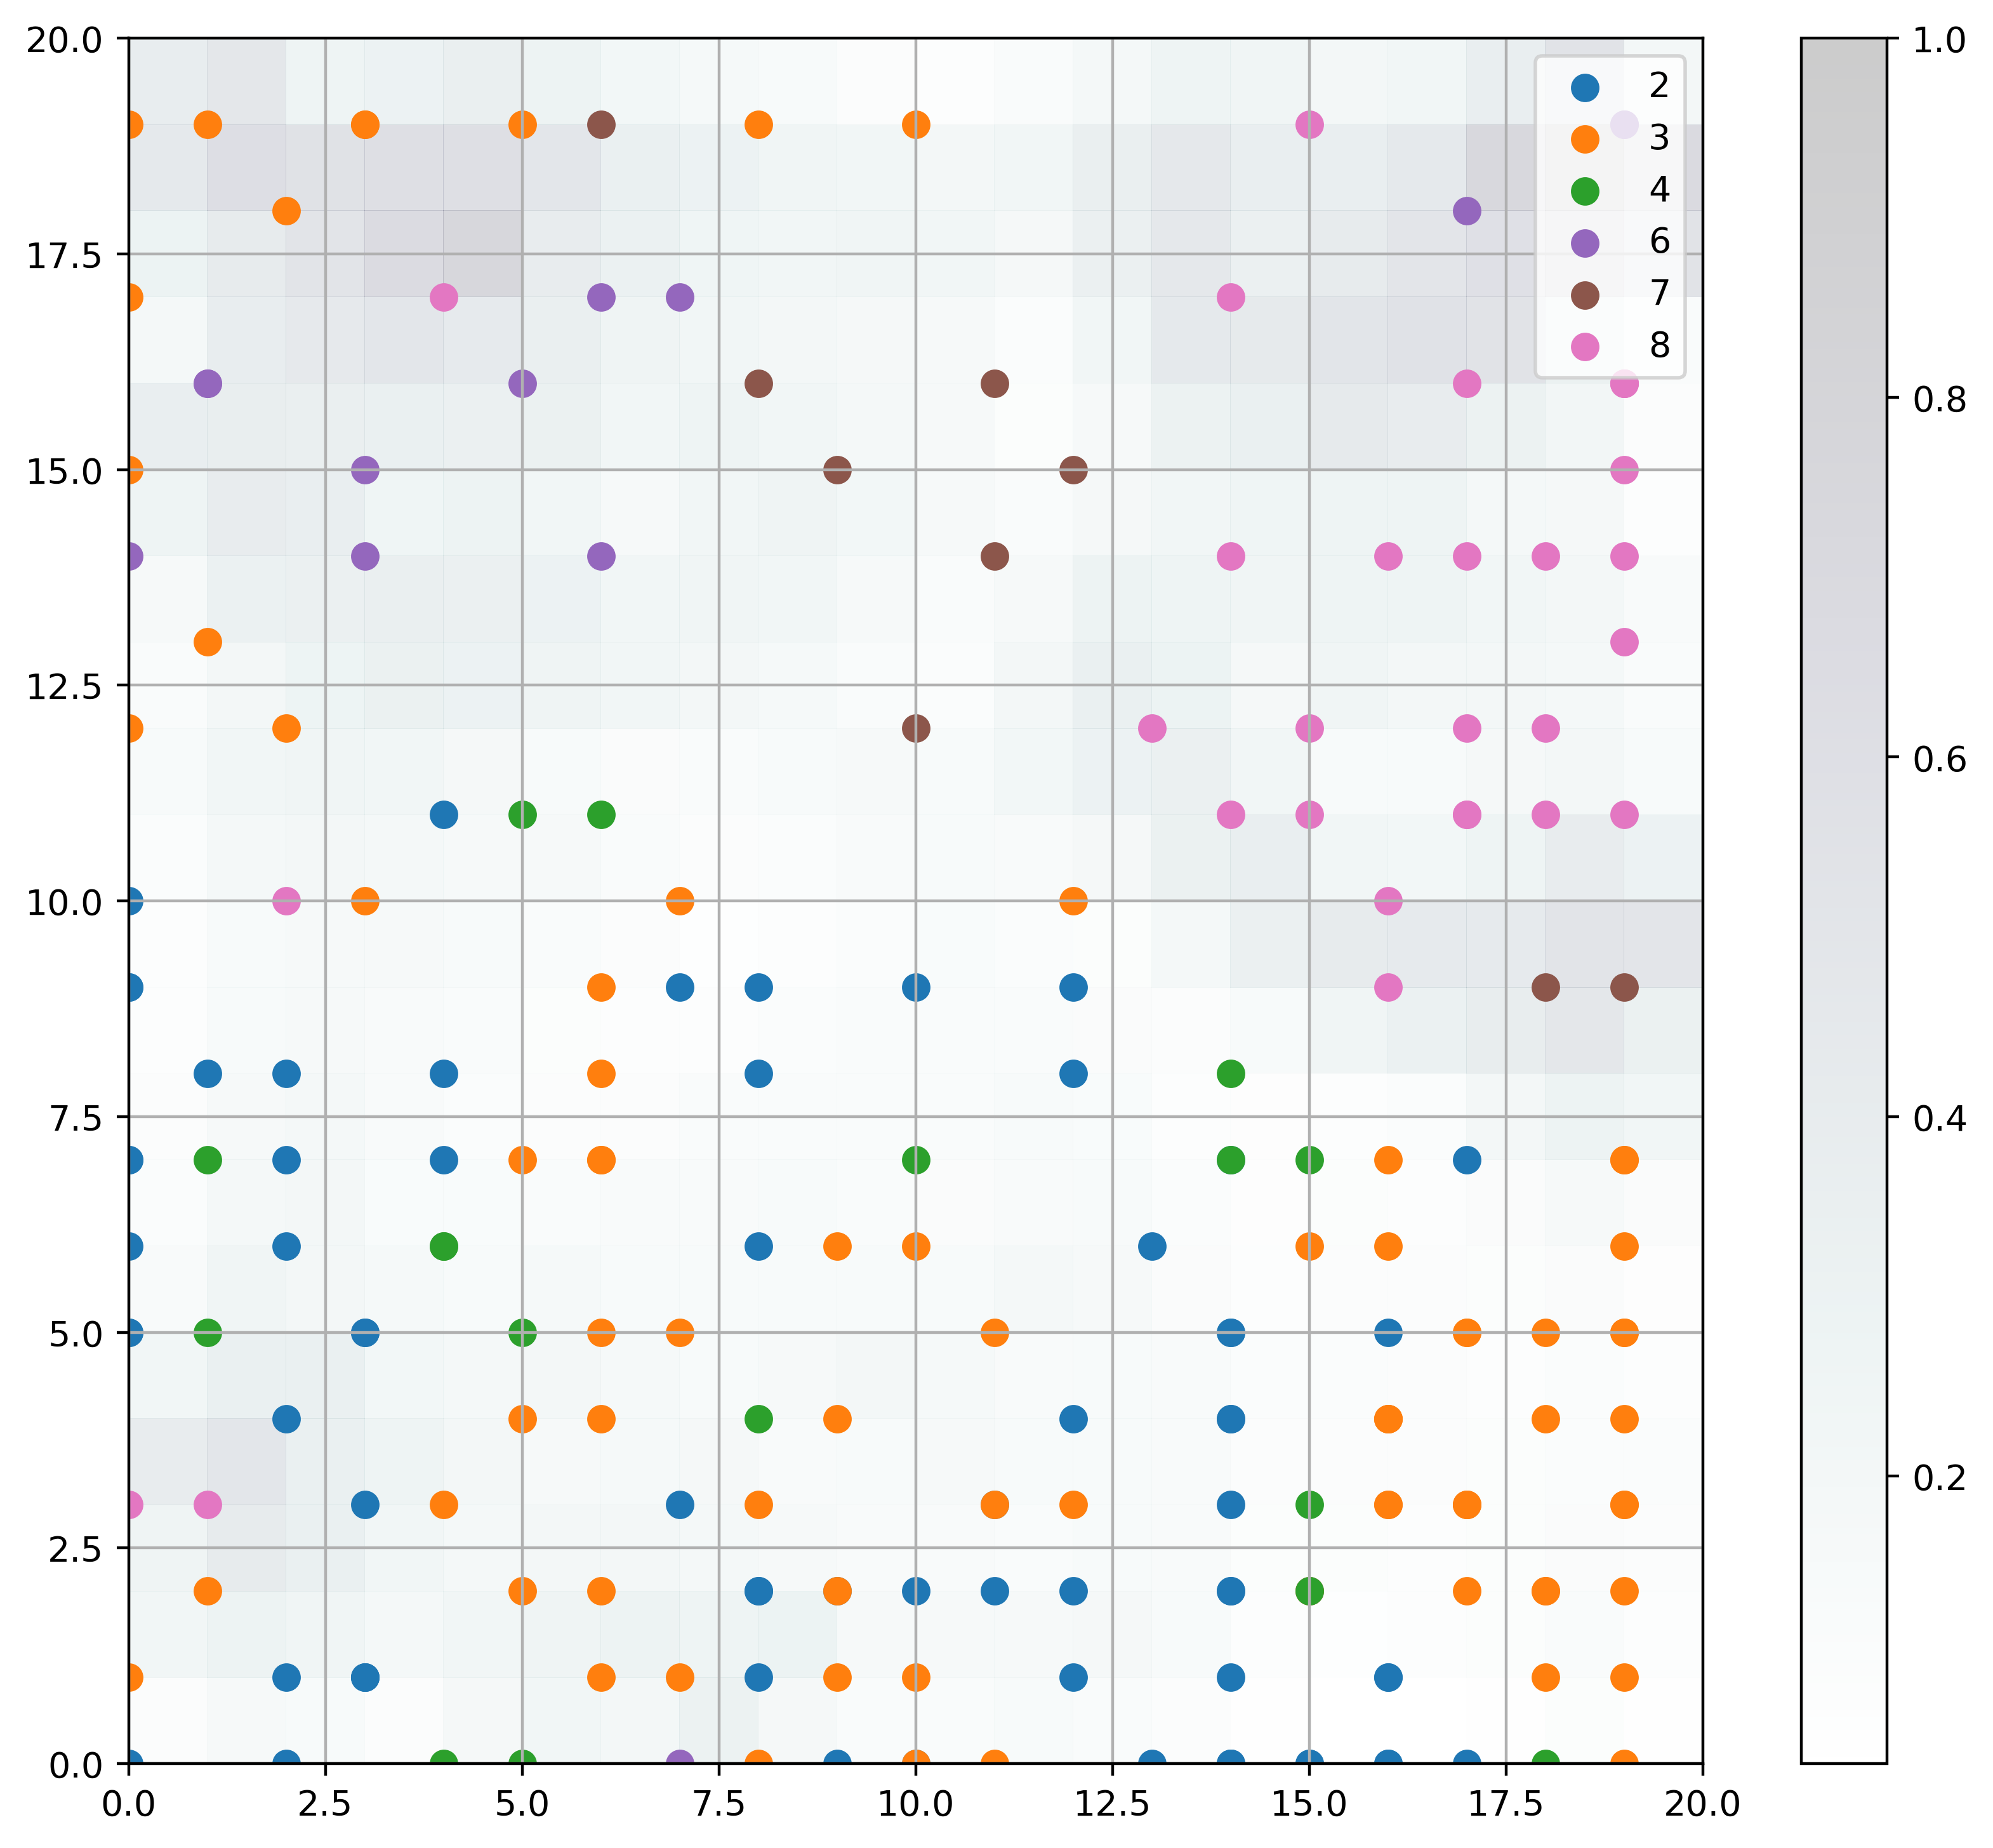

In [16]:
w_x, w_y = zip(*[som.winner(d) for d in training_data])
w_x = np.array(w_x)
w_y = np.array(w_y)

plt.figure(figsize=(10, 9))
plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=.2)
plt.colorbar()

for c in np.unique(target):
    idx_target = target==c
    plt.scatter(w_x[idx_target],
                w_y[idx_target],
                s=50, c=colors[c-1], label=label_names[c])
plt.legend(loc='upper right')
plt.grid()
plt.show()

In [25]:
w = som.get_weights()

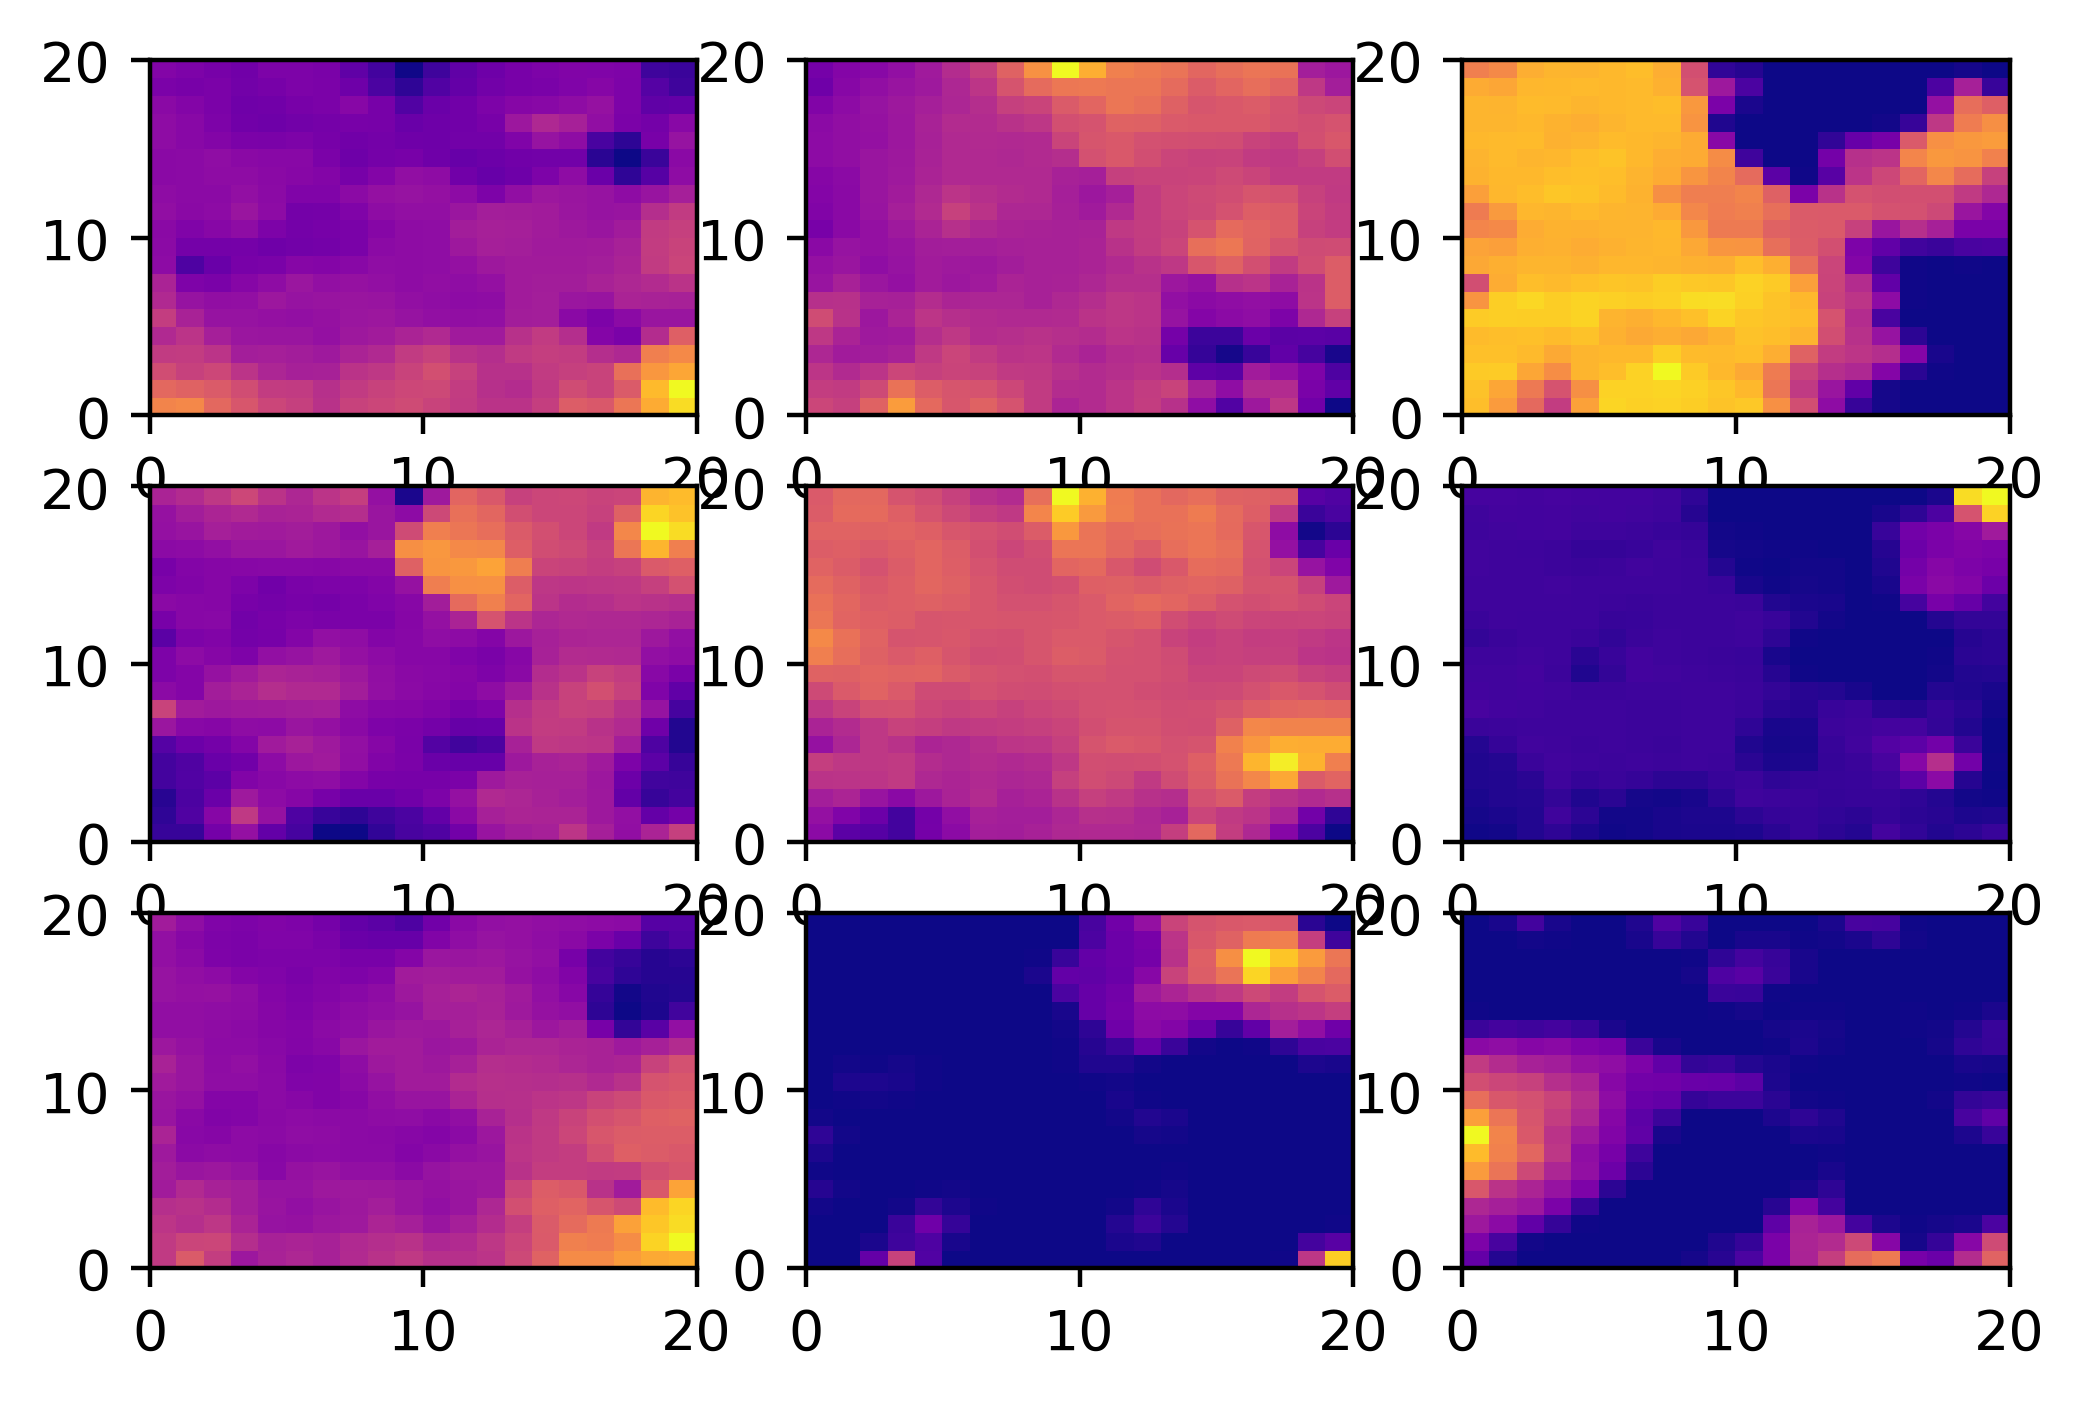

In [35]:
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.pcolor(w[:, :, i], cmap='plasma')